In [4]:
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm 
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# Sect3. Cost 최소화기법, How to minimize cost

### Cost minimize 1
#### 간단한 가설, Linear Model
##### Our hypothesis for linear model X * W
> hypothesis = X * W


> $$H(x) = Wx$$

##### cost/loss function
>cost = tf.reducemean(tf.square(hypothesis - Y))


>$$cost(W) = \frac{1}{m} \sum^m{i=1}(H(x^{(i)}-y^{(i)})^2$$

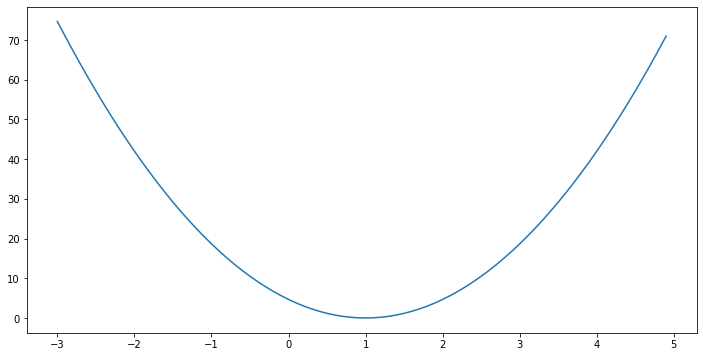

In [5]:
# import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

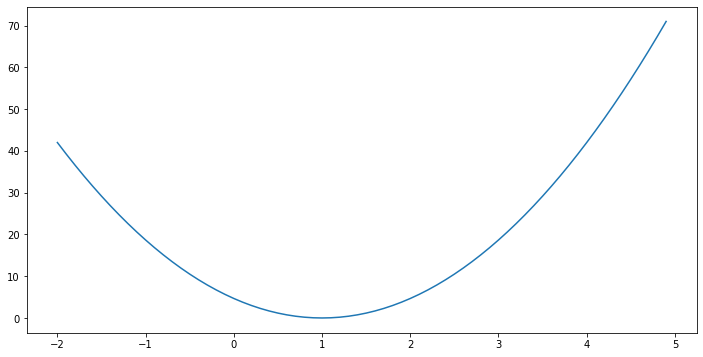

In [6]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-20, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

### Cost minimize 2
#### Gradient descent
- $$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$
- $$W := W - a\frac{1}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$$

In [7]:
# import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))    
    print("step={step},   \t sess_cost={sess_cost},    \t W={sess_W}".format(
            step=step, 
            sess_cost=sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
            sess_W=sess.run(W)
            ));

step=0,   	 sess_cost=8.608514785766602,    	 W=[0.21584824]
step=1,   	 sess_cost=2.4486441612243652,    	 W=[0.58178574]
step=2,   	 sess_cost=0.6965031623840332,    	 W=[0.7769524]
step=3,   	 sess_cost=0.1981164515018463,    	 W=[0.8810413]
step=4,   	 sess_cost=0.056353069841861725,    	 W=[0.9365554]
step=5,   	 sess_cost=0.016029341146349907,    	 W=[0.96616286]
step=6,   	 sess_cost=0.004559478256851435,    	 W=[0.9819535]
step=7,   	 sess_cost=0.0012969126692041755,    	 W=[0.9903752]
step=8,   	 sess_cost=0.00036889989860355854,    	 W=[0.9948668]
step=9,   	 sess_cost=0.0001049291095114313,    	 W=[0.9972623]
step=10,   	 sess_cost=2.9848441045032814e-05,    	 W=[0.99853987]
step=11,   	 sess_cost=8.490265827276744e-06,    	 W=[0.99922127]
step=12,   	 sess_cost=2.414929895167006e-06,    	 W=[0.9995847]
step=13,   	 sess_cost=6.868148147987085e-07,    	 W=[0.9997785]
step=14,   	 sess_cost=1.953024622025623e-07,    	 W=[0.99988186]
step=15,   	 sess_cost=5.5592256131831164e-

### Cost minimize 3

In [8]:
# import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

In [9]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in range(101):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            )); 
                
    sess.run(train)

step=0, 	 W=5.0
step=1, 	 W=1.2666664123535156
step=2, 	 W=1.0177778005599976
step=3, 	 W=1.0011851787567139
step=4, 	 W=1.0000790357589722
step=5, 	 W=1.0000052452087402
step=6, 	 W=1.0000003576278687
step=7, 	 W=1.0
step=8, 	 W=1.0
step=9, 	 W=1.0
step=10, 	 W=1.0
step=20, 	 W=1.0
step=30, 	 W=1.0
step=40, 	 W=1.0
step=50, 	 W=1.0
step=60, 	 W=1.0
step=70, 	 W=1.0
step=80, 	 W=1.0
step=90, 	 W=1.0
step=100, 	 W=1.0


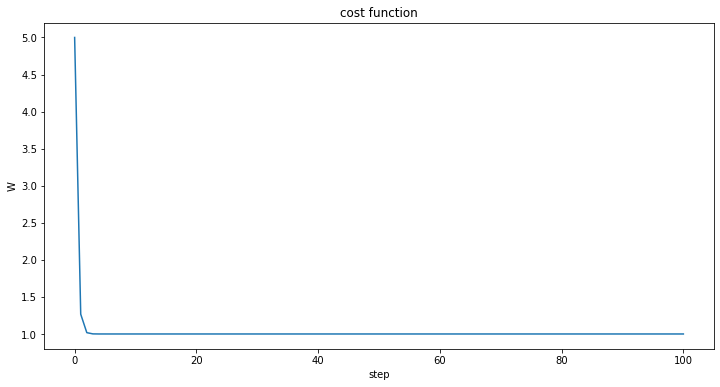

In [10]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.show()

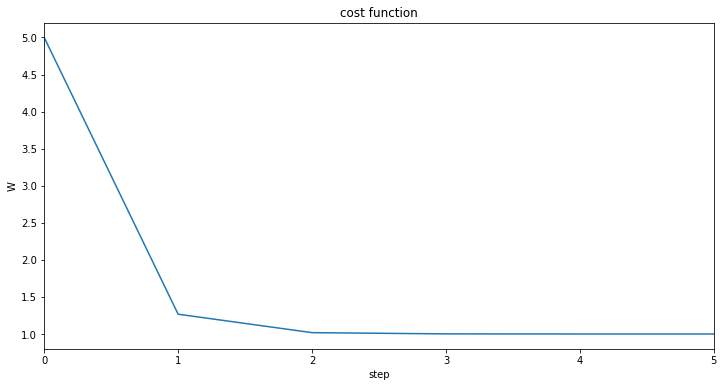

In [11]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.xlim(0, 5)
plt.show()

In [12]:
type(train)

tensorflow.python.framework.ops.Operation